In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn.metrics import roc_auc_score, r2_score, mean_squared_error,classification_report

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet

In [3]:
train=pd.read_csv("./data/train/datacountstudents_train.csv")
train=train.drop(['id'], axis=1)
#train.head()

In [4]:
X_train=train.drop(['yC'], axis=1)
Y_train=train['yC']
X_train.shape, Y_train.shape

((120, 32), (120,))

In [5]:
test=pd.read_csv("./data/test/datacountstudents_test.csv")
test=test.drop(['id'], axis=1)
#test.head()

In [6]:
X_test=test.drop(['yC'], axis=1)
Y_test=test['yC']
X_test.shape, Y_test.shape

((30, 32), (30,))

#### Análisis variables numéricas vs target

Resumen estadístico

In [7]:
train.describe()

,yC,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,1.216667,64.530643,49.414167,0.308333,0.150000,0.033333,0.125000,0.083333,15.478996,28.133333,...,0.228209,0.027143,6.450000,5.558333,78.822689,0.141667,0.041667,3.866667,0.300111,0.515788
std,1.258139,10.093439,40.977939,0.463741,0.358569,0.180258,0.332106,0.277544,1.913951,15.052253,...,0.335089,0.112337,0.877832,0.985575,49.591147,0.350170,0.200664,2.145675,0.195522,0.297028
min,0.000000,34.217000,4.600000,0.000000,0.000000,0.000000,0.000000,0.000000,10.617270,0.000000,...,0.000000,0.000000,5.000000,3.000000,11.087400,0.000000,0.000000,1.000000,0.020398,0.040737
25%,0.000000,57.452500,14.300000,0.000000,0.000000,0.000000,0.000000,0.000000,14.586870,27.750000,...,0.001525,0.000000,6.000000,5.000000,43.637425,0.000000,0.000000,2.000000,0.107324,0.213143
50%,1.000000,67.946500,37.900000,0.000000,0.000000,0.000000,0.000000,0.000000,15.421435,31.000000,...,0.019950,0.000100,6.000000,6.000000,66.143600,0.000000,0.000000,4.000000,0.262157,0.495616
75%,2.000000,71.690097,77.500000,1.000000,0.000000,0.000000,0.000000,0.000000,16.542645,40.250000,...,0.407775,0.001225,7.000000,6.000000,104.938750,0.000000,0.000000,6.000000,0.494643,0.808403
max,7.000000,78.836829,159.400000,1.000000,1.000000,1.000000,1.000000,1.000000,20.850060,45.000000,...,0.985000,0.746200,9.000000,7.000000,344.830000,1.000000,1.000000,7.000000,0.662330,0.996328


Correlación

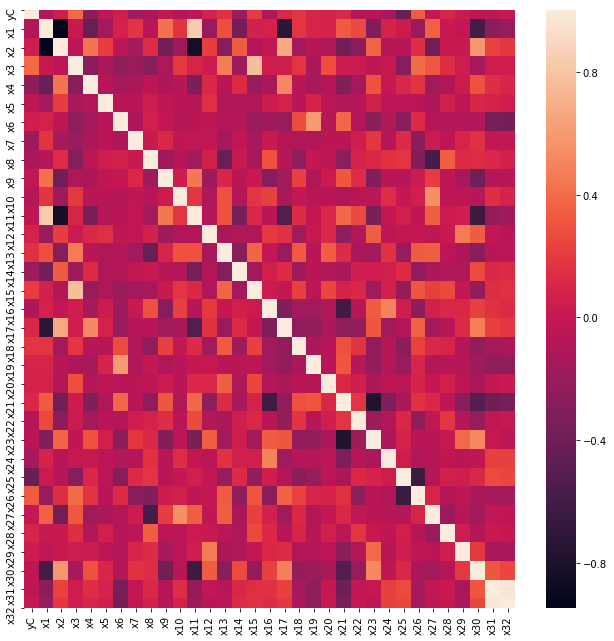

In [8]:
corrmat = train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

Estandarización de regresoras Train

In [9]:
columns=X_train.columns.values.tolist()

In [10]:
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
X_train=scaler.transform(X_train.fillna(0))

In [12]:
X_train=pd.DataFrame(X_train, columns=columns)

Estandarización de regresoras Test

In [13]:
columns1=X_test.columns.values.tolist()

In [14]:
X_test=scaler.transform(X_test.fillna(0))

In [15]:
X_test=pd.DataFrame(X_test, columns=columns1)

In [16]:
# Modelo con todas las características para determinar importancia

seed_val = 99
np.random.seed(seed_val)

model_all_features = LogisticRegression(C=1.0, l1_ratio=0.75, penalty='elasticnet', multi_class='multinomial', 
                                        solver='saga', max_iter=10000)

model_all_features.fit(X_train, Y_train)

y_pred_test = model_all_features.predict(X_test)
r2_score_all = r2_score(Y_test, y_pred_test)
print('Test all features model R2 = %f' % (r2_score_all))

Test all features model R2 = -0.211009


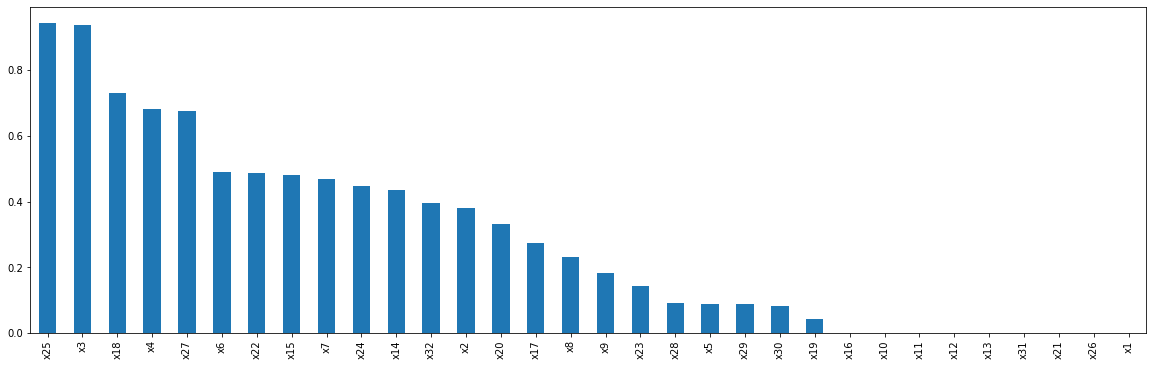

In [17]:
features = pd.Series(abs(model_all_features.coef_[0,:])) # esto con valor absoluto?
features.index = X_train.columns

features.sort_values(ascending=False, inplace=True)

features.plot.bar(figsize=(20,6))

In [18]:
features = list(features.index)
features

['x25',
 'x3',
 'x18',
 'x4',
 'x27',
 'x6',
 'x22',
 'x15',
 'x7',
 'x24',
 'x14',
 'x32',
 'x2',
 'x20',
 'x17',
 'x8',
 'x9',
 'x23',
 'x28',
 'x5',
 'x29',
 'x30',
 'x19',
 'x16',
 'x10',
 'x11',
 'x12',
 'x13',
 'x31',
 'x21',
 'x26',
 'x1']

In [19]:
# Modelo con la característca más importante (desde la que se inicia la adición)

seed_val = 99
np.random.seed(seed_val)

model_one_feature = LogisticRegression(C=1.0, l1_ratio=0.75, penalty='elasticnet', multi_class='multinomial', 
                                        solver='saga', max_iter=10000)

model_one_feature.fit(X_train[features[0]].to_frame(), Y_train)

y_pred_test = model_one_feature.predict(X_test[features[0]].to_frame())
r2_score_first = r2_score(Y_test, y_pred_test)
print('Test one feature model R2=%f' % (r2_score_first))

Test one feature model R2=-0.183486


In [20]:
# Adición de características y evaluación de modelos, una a la vez (en orden de importancia)

tol = 0.001

print('doing recursive feature addition')

features_to_keep = [features[0]]

count = 1

for feature in features[1:]:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    model_int = LogisticRegression(C=1.0, l1_ratio=0.75, penalty='elasticnet', multi_class='multinomial', 
                                        solver='saga', max_iter=10000)

    model_int.fit(
        X_train[features_to_keep + [feature] ], Y_train)

    y_pred_test = model_int.predict(
        X_test[features_to_keep + [feature] ])

    r2_score_int = r2_score(Y_test, y_pred_test)
    print('New Test R2={}'.format((r2_score_int)))

    print('All features Test R2={}'.format((r2_score_first)))

    diff_r2 = r2_score_int - r2_score_first

    if diff_r2 >= tol:
        print('Increase in r2 = {}'.format(diff_r2))
        print('keep: ', feature)
        print

        r2_score_first = r2_score_int

        features_to_keep.append(feature)
    else:
        print('Increase in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print

print()
print('DONE!!')
print('total features to keep: ', len(features_to_keep))
print('selected features: ', features_to_keep)
print('final test R2 score={}'.format(r2_score_first))

doing recursive feature addition

testing feature:  x3  which is feature  1  out of  32
New Test R2=-0.05963302752293598
All features Test R2=-0.18348623853211032
Increase in r2 = 0.12385321100917435
keep:  x3

testing feature:  x18  which is feature  2  out of  32
New Test R2=-0.10091743119266061
All features Test R2=-0.05963302752293598
Increase in r2 = -0.041284403669724634
remove:  x18

testing feature:  x4  which is feature  3  out of  32
New Test R2=-0.05963302752293598
All features Test R2=-0.05963302752293598
Increase in r2 = 0.0
remove:  x4

testing feature:  x27  which is feature  4  out of  32
New Test R2=-0.01834862385321112
All features Test R2=-0.05963302752293598
Increase in r2 = 0.041284403669724856
keep:  x27

testing feature:  x6  which is feature  5  out of  32
New Test R2=-0.01834862385321112
All features Test R2=-0.01834862385321112
Increase in r2 = 0.0
remove:  x6

testing feature:  x22  which is feature  6  out of  32
New Test R2=-0.004587155963302836
All feature

In [21]:
# Modelo con características seleccionadas

seed_val = 99
np.random.seed(seed_val)

final_model = LogisticRegression(C=1.0, l1_ratio=0.75, penalty='elasticnet', multi_class='multinomial', 
                                        solver='saga', max_iter=10000)

final_model.fit(X_train[features_to_keep], Y_train)

y_pred_test = final_model.predict(X_test[features_to_keep])

r2_score_final = r2_score(Y_test, y_pred_test)
print('Test selected features R2=%f' % (r2_score_final))

mse = mean_squared_error(Y_test, y_pred_test)
print('Test selected features mse=%f' % (mse))

Test selected features R2=0.160550
Test selected features mse=2.033333


In [22]:
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63         9
           1       0.18      0.40      0.25         5
           2       0.57      0.40      0.47        10
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           0.40        30
   macro avg       0.19      0.21      0.19        30
weighted avg       0.40      0.40      0.39        30



C:\Users\Juan Camilo Ceballos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Juan Camilo Ceballos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Juan Camilo Ceballos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
pd.crosstab(Y_test,y_pred_test,rownames=["Actual"],colnames=["Predictions"])

Predictions,0,1,2,3
Actual,,,,
0,6,3,0,0
1,2,2,1,0
2,1,4,4,1
3,1,1,0,0
4,0,0,2,0
5,0,1,0,0
6,0,0,0,1
